In [18]:
from itertools import product
from sqlalchemy import select, Table, MetaData

import sqlalchemy
from sqlalchemy import create_engine, text

In [9]:
from sqlalchemy import create_engine

engine = create_engine(
    "mysql+pymysql://root@localhost:3306/MLC"
)

In [12]:
sql_query = text("SELECT * FROM products;")
with engine.connect() as conn:
    results = conn.execute(sql_query)
    for row in results:
        print(row)


(1, 'Trek 820 - 2016', 9, 6, 2016, 379.99)
(2, 'Ritchey Timberwolf Frameset - 2016', 5, 6, 2016, 749.99)
(3, 'Surly Wednesday Frameset - 2016', 8, 6, 2016, 999.99)
(4, 'Trek Fuel EX 8 29 - 2016', 9, 6, 2016, 2899.99)
(5, 'Heller Shagamaw Frame - 2016', 3, 6, 2016, 1320.99)
(6, 'Surly Ice Cream Truck Frameset - 2016', 8, 6, 2016, 469.99)
(7, 'Trek Slash 8 27.5 - 2016', 9, 6, 2016, 3999.99)
(8, 'Trek Remedy 29 Carbon Frameset - 2016', 9, 6, 2016, 1799.99)
(9, 'Trek Conduit+ - 2016', 9, 5, 2016, 2999.99)
(10, 'Surly Straggler - 2016', 8, 4, 2016, 1549.0)
(11, 'Surly Straggler 650b - 2016', 8, 4, 2016, 1680.99)
(12, 'Electra Townie Original 21D - 2016', 1, 3, 2016, 549.99)
(13, 'Electra Cruiser 1 (24-Inch) - 2016', 1, 3, 2016, 269.99)
(14, "Electra Girl's Hawaii 1 (16-inch) - 2015/2016", 1, 3, 2016, 269.99)
(15, 'Electra Moto 1 - 2016', 1, 3, 2016, 529.99)
(16, 'Electra Townie Original 7D EQ - 2016', 1, 3, 2016, 599.99)
(17, 'Pure Cycles Vine 8-Speed - 2016', 4, 3, 2016, 429.0)
(18, "Pure 

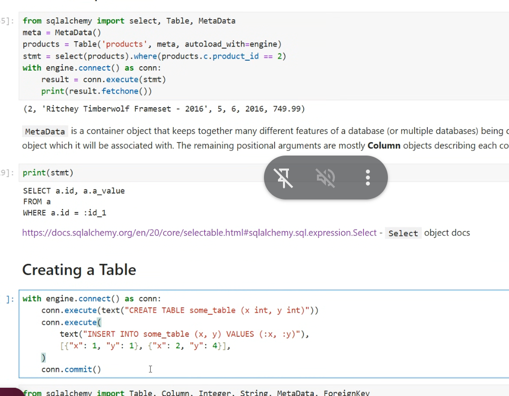

In [17]:
meta = MetaData()
products = Table("products", meta, autoload_with=engine)
stmt = select(products).where(products.c.product_id == 2)
with engine.connect() as conn:
    results = conn.execute(stmt)
    print(results.fetchone())

(2, 'Ritchey Timberwolf Frameset - 2016', 5, 6, 2016, Decimal('749.9900000000'))


In [43]:
# print('\nList 10 most expensive products')
# stmt = select(products).order_by(products.c.list_price.desc()).limit(10)
# with engine.connect() as conn:
#     results = conn.execute(stmt)
#     for row in results:
#         print(row)
#
# print('\nFind distinct model years')
# stmt = select(products.c.model_year).distinct()
# with engine.connect() as conn:
#     results = conn.execute(stmt)
#     for row in results:
#         print(row)
#
# print('\nCustomers from CA or NY')
# meta = MetaData()
# customers = Table("customers", meta, autoload_with=engine)
# stmt = select(customers).where(customers.c.state.in_(['CA', 'NY']))
# with engine.connect() as conn:
#     results = conn.execute(stmt)
#     for row in results:
#         print(row)

print('\nProducts priced between 500 and 1000')
stmt = select(products.c['product_id', 'product_name']).where(products.c.list_price.between(500, 1000))
with engine.connect() as conn:
    results = conn.execute(stmt)
    for row in results:
        print(row)



Products priced between 500 and 1000
(2, 'Ritchey Timberwolf Frameset - 2016')
(3, 'Surly Wednesday Frameset - 2016')
(12, 'Electra Townie Original 21D - 2016')
(15, 'Electra Moto 1 - 2016')
(16, 'Electra Townie Original 7D EQ - 2016')
(20, "Electra Townie Original 7D EQ - Women's - 2016")
(24, 'Electra Townie Original 21D - 2016')
(26, 'Electra Townie Original 7D EQ - 2016')
(27, 'Surly Big Dummy Frameset - 2017')
(29, 'Trek X-Caliber 8 - 2017')
(30, 'Surly Ice Cream Truck Frameset - 2017')
(35, 'Sun Bicycles Spider 3i - 2017')
(36, 'Surly Troll Frameset - 2017')
(38, 'Haro Flightline Two 26 Plus - 2017')
(44, 'Haro SR 1.1 - 2017')
(45, 'Haro SR 1.2 - 2017')
(52, 'Surly Steamroller - 2017')
(53, 'Surly Ogre Frameset - 2017')
(70, 'Electra Amsterdam Original 3i - 2015/2017')
(72, 'Sun Bicycles Biscayne Tandem 7 - 2017')
(73, 'Sun Bicycles Brickell Tandem 7 - 2017')
(75, 'Electra Cruiser Lux Fat Tire 1 Ladies - 2017')
(77, "Electra Glam Punk 3i Ladies' - 2017")
(78, 'Sun Bicycles Bisca